In [2]:
import pandas as pd
act = pd.read_csv("D:/000-Master/UserClustering/sample_activity_Oct-22-2018.csv")
act.rename(columns = {'Unnamed: 0':'index'},inplace=True)
loc = pd.read_csv("D:/000-Master/UserClustering/sample_location_Oct-22-2018.csv")
loc.rename(columns = {'Unnamed: 0':'index'},inplace=True)
city_list = (dict(loc['city'].value_counts()))

act['start_date'] = act['local_start_time'].astype(str).str[:10]
act['local_start_time'] = act['local_start_time'].astype(str).str[:19]
act['local_start_time'] = pd.to_datetime(act['local_start_time'])
act['local_start_hour'] = act['local_start_time'].dt.hour

act['local_end_time'] = act['local_end_time'].astype(str).str[:19]
act['local_end_time'] = pd.to_datetime(act['local_end_time'])

import numpy as np
cols = ['loc_id','center_lat','center_lon']
df = loc[cols]

df.rename(columns = {'loc_id':'orig_loc_id'},inplace=True)
x = pd.merge(act, df, on="orig_loc_id")
x.rename(columns = {'center_lat':'orig_lat',
                   'center_lon':'orig_lon'},inplace=True)

df.rename(columns = {'orig_loc_id':'dest_loc_id'},inplace=True)
x = pd.merge(x, df, on="dest_loc_id")
x.rename(columns = {'center_lat':'dest_lat',
                   'center_lon':'dest_lon'},inplace=True)
act = x

In [3]:
print(act.shape)
act.head()

(85205, 14)


,index,trip_id,user_id,orig_loc_id,dest_loc_id,local_start_time,local_end_time,city,start_date,local_start_hour,orig_lat,orig_lon,dest_lat,dest_lon
0,1,2081071,16094,1,2,2018-03-14 12:07:18,2018-03-14 12:18:51,elpaso,2018-03-14,12,31.762442,-106.263962,31.775521,-106.308802
1,25,2159273,16094,1,2,2018-04-03 19:22:37,2018-04-03 19:38:30,elpaso,2018-04-03,19,31.762442,-106.263962,31.775521,-106.308802
2,71,2262622,16094,1,2,2018-04-28 11:21:08,2018-04-28 11:31:55,elpaso,2018-04-28,11,31.762442,-106.263962,31.775521,-106.308802
3,105,2352800,16094,1,2,2018-05-19 16:58:34,2018-05-19 17:11:17,elpaso,2018-05-19,16,31.762442,-106.263962,31.775521,-106.308802
4,110,2385335,16094,1,2,2018-05-28 14:03:31,2018-05-28 14:14:09,elpaso,2018-05-28,14,31.762442,-106.263962,31.775521,-106.308802


In [4]:
loc = loc.loc[loc['city'] == 'tucson']
print(loc.shape)
loc.head()

(1189, 10)


,index,loc_id,user_id,center_lat,center_lon,fan_in,fan_out,city,cluster,last_updated_utc
10,10,18151,9246,32.110997,-110.788098,0,8,tucson,"[[32.110997, -110.788098], [32.110772, -110.78...",2018-10-22 08:10:31.232072+00:00
17,17,18563,31764,32.618454,-110.816132,4,2,tucson,"[[32.618454, -110.816132], [32.618454, -110.81...",2018-10-22 08:24:24.770179+00:00
20,20,12777,2,32.250938,-110.927725,3,3,tucson,"[[32.251139, -110.927816], [32.251139, -110.92...",2018-09-24 23:27:30.597439+00:00
23,23,2843,13277,32.283365,-110.963552,19,19,tucson,"[[32.283365, -110.963552], [32.283365, -110.96...",2018-10-22 08:10:12.479053+00:00
24,24,9335,36116,32.290059,-110.983941,59,40,tucson,"[[32.288961, -110.98386], [32.288961, -110.983...",2018-10-22 08:20:00.672793+00:00


In [5]:
### Convert lon and lat into distance
### Origin is bottom left
import math
O = [min(loc['center_lat']),min(loc['center_lon'])]
loc['center_x'] = (loc['center_lon']-O[1])*111.2*np.cos(np.radians(loc['center_lat'])) # x - lon - km
loc['center_y'] = (loc['center_lat']-O[0])*111.2 # y - lat - km
# loc.head()
data = loc.iloc[:,[1,10,11]]
data.head()

,loc_id,center_x,center_y
10,18151,50.433670,28.956146
17,18563,47.525670,85.385365
20,12777,37.225158,44.517586
23,2843,33.843731,48.123468
24,9335,31.924634,48.867819


In [6]:
print(len(data))

1189


Text(0,0.5,'y/km')

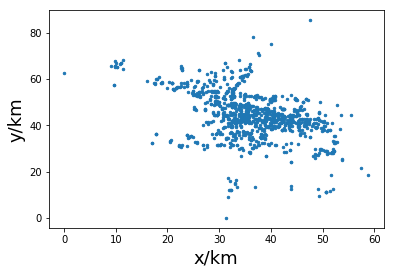

In [9]:
import matplotlib.pyplot as plt
plt.scatter(loc.center_x, loc.center_y, s = 6)
plt.xlabel('x/km', fontsize = 18)
plt.ylabel('y/km', fontsize = 18)

<Figure size 1800x720 with 0 Axes>

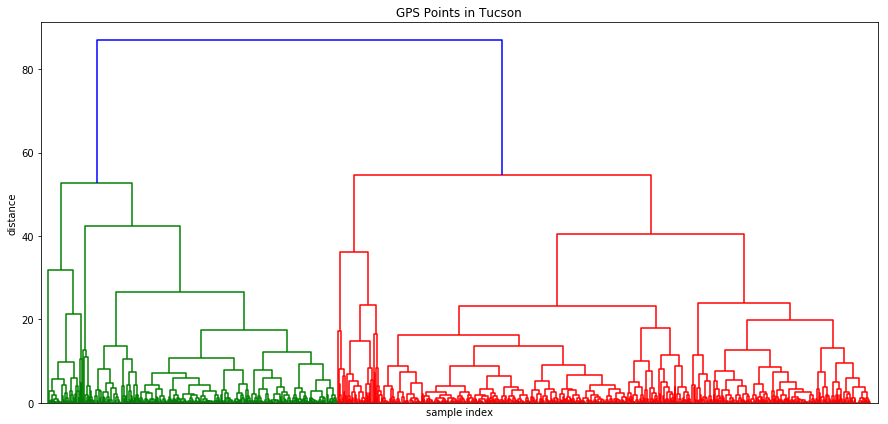

In [330]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

X = data[['center_x','center_y']]
Z = linkage(X, 'complete')
fig = plt.figure(figsize=(25, 10))
plt.figure(figsize=(15, 7))  
plt.title("GPS Points in Tucson") 
plt.xlabel('sample index')
plt.ylabel('distance')
# plt.axhline(y=0.8, color='k', linestyle='-')
dn = dendrogram(Z,leaf_rotation=90.,leaf_font_size=2.)
plt.xticks([])
plt.xlim([-100,12000])
plt.show()

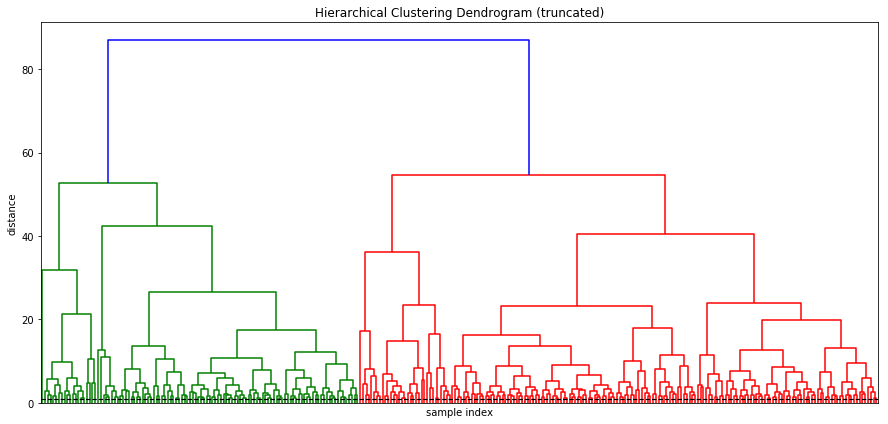

In [331]:
plt.figure(figsize=(15, 7))  
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.axhline(y=0.8, color='k', linestyle='--',linewidth=1.2)
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=300,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=2.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.xticks([])
# plt.xlim([-50,2030])
plt.show()

In [332]:
from scipy.cluster.hierarchy import fcluster
assignments = fcluster(linkage(X, method='complete'),1.5,'distance')
data['labels'] = assignments
print(max(assignments))

import collections, numpy
print(collections.Counter(assignments))

261
Counter({239: 27, 139: 20, 171: 18, 60: 17, 133: 17, 140: 15, 260: 14, 146: 14, 79: 13, 89: 13, 169: 12, 155: 12, 138: 12, 66: 12, 3: 11, 174: 11, 142: 11, 127: 11, 58: 10, 75: 10, 210: 10, 231: 10, 56: 10, 221: 10, 166: 9, 144: 9, 67: 9, 168: 9, 52: 9, 57: 9, 49: 9, 33: 9, 175: 9, 83: 8, 154: 8, 86: 8, 163: 8, 157: 8, 150: 8, 229: 8, 227: 8, 47: 7, 131: 7, 94: 7, 62: 7, 156: 7, 130: 7, 245: 7, 151: 7, 261: 7, 111: 7, 153: 7, 161: 7, 259: 7, 48: 7, 129: 7, 23: 6, 201: 6, 179: 6, 173: 6, 55: 6, 91: 6, 6: 6, 53: 6, 257: 6, 54: 6, 32: 6, 90: 6, 30: 6, 241: 6, 170: 6, 50: 6, 183: 6, 223: 6, 224: 6, 220: 6, 159: 6, 237: 6, 88: 6, 236: 6, 200: 6, 108: 5, 31: 5, 247: 5, 147: 5, 184: 5, 172: 5, 69: 5, 84: 5, 71: 5, 95: 5, 82: 5, 2: 5, 235: 5, 217: 5, 165: 5, 167: 5, 178: 5, 74: 5, 132: 5, 177: 5, 211: 5, 203: 5, 78: 5, 21: 5, 162: 5, 180: 4, 222: 4, 43: 4, 9: 4, 255: 4, 196: 4, 36: 4, 148: 4, 28: 4, 107: 4, 242: 4, 123: 4, 240: 4, 105: 4, 73: 4, 192: 4, 27: 4, 194: 4, 51: 4, 63: 4, 195: 4,

D:\Download\Anaconda\A3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


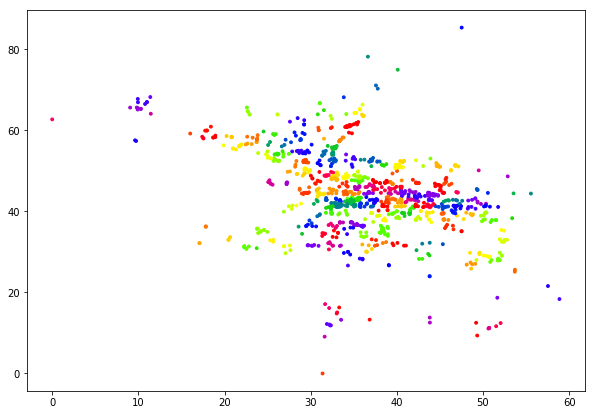

In [323]:
plt.figure(figsize=(10, 7))  
plt.scatter(data['center_x'], data['center_y'], c=data['labels'], cmap='prism',s = 8)  

In [334]:
# To see if the distance is small enough
one = data.loc[data['labels'] == 239]

one_1 = one.loc[one.index.repeat(len(one))].reset_index(drop=True) # reset index

one_2 = one
one_2 = pd.concat([one_2]*len(one_2), ignore_index=True)
one_2.rename(columns = {'loc_id':'loc_id_2','center_y': 'center_y_2','center_x':'center_x_2'},inplace=True)

one_3 = one_1.join(one_2, lsuffix='_one_1', rsuffix='_one_2') # IMPORTANT!!!

from sklearn.metrics.pairwise import pairwise_distances 
from sklearn.cluster import DBSCAN 
from geopy.distance import vincenty

# unit in km
one_3['distance'] = np.sqrt(np.square(one_3['center_y']-one_3['center_y_2'])+np.square(one_3['center_x']-one_3['center_x_2']))
one_distance_matrix = one_3.pivot_table(index=['loc_id'],columns=['loc_id_2'],values='distance')
one_distance_matrix.describe()

loc_id_2,23,219,627,2144,3816,3831,3902,4722,6061,6390,...,16232,16989,17263,17426,18053,18409,18542,18583,18717,18740
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.460867,0.515587,0.638476,0.482975,0.415965,0.624380,0.526171,0.444951,0.514686,0.434180,...,0.462997,0.789104,0.860236,0.741234,0.416077,0.522345,0.417332,0.549613,0.557611,0.900630
std,0.339931,0.220744,0.262087,0.250090,0.231831,0.239646,0.368552,0.306414,0.328486,0.190374,...,0.196047,0.347755,0.383623,0.320438,0.199092,0.358101,0.298141,0.345957,0.356235,0.393466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.176513,0.369317,0.445507,0.318071,0.288789,0.450850,0.256244,0.160033,0.201176,0.329457,...,0.387997,0.564224,0.646382,0.505621,0.283792,0.235915,0.218109,0.341649,0.359669,0.692946
50%,0.366983,0.547552,0.671511,0.450234,0.391613,0.658414,0.465000,0.378573,0.492270,0.456451,...,0.467709,0.909408,1.003068,0.849262,0.432319,0.481270,0.342508,0.472257,0.444869,1.052738
75%,0.667116,0.721510,0.869561,0.598202,0.479686,0.784113,0.711660,0.659803,0.760234,0.570066,...,0.608531,1.028644,1.128933,1.026736,0.528253,0.764780,0.589706,0.644101,0.667327,1.178552
max,1.159923,0.781301,0.956431,1.062562,0.974959,1.003886,1.308152,1.052738,1.111997,0.734350,...,0.758941,1.244983,1.317648,1.117278,0.814158,1.197180,1.068300,1.325226,1.346748,1.355471


In [ ]:
one_distance_matrix.head()

In [201]:
### 下面是没用的 ####
df = loc[['loc_id','center_lat','center_lon']]
df = df.drop_duplicates()
df = df.loc[df.index.repeat(len(df))].reset_index(drop=True) # reset index

df2 = loc[['loc_id','center_lat','center_lon']]
df2 = df2.drop_duplicates()
df2 = pd.concat([df2]*len(df2), ignore_index=True)
df2.rename(columns = {'loc_id':'loc_id_2','center_lat': 'center_lat_2','center_lon':'center_lon_2'},inplace=True)

# join
df3 = df.join(df2, lsuffix='_df', rsuffix='_df2') # IMPORTANT!!!
print(df3.shape)
df3.head()

# vincenty distance
from sklearn.metrics.pairwise import pairwise_distances 
from geopy.distance import vincenty

# unit in km
df3['Vincenty_distance'] = df3.dropna().apply(lambda x: vincenty((x['center_lat'], x['center_lon']), (x['center_lat_2'], x['center_lon_2'])).km, axis = 1)
distance_matrix = df3.pivot_table(index=['loc_id'],columns=['loc_id_2'],values='Vincenty_distance')
distance_matrix.head()

In [275]:
# method 2: check if vincenty dist is right, faster than the above one
df = loc[['loc_id','center_y','center_x']]
df = df.drop_duplicates()
df = df.loc[df.index.repeat(len(df))].reset_index(drop=True) # reset index

df2 = loc[['loc_id','center_y','center_x']]
df2 = df2.drop_duplicates()
df2 = pd.concat([df2]*len(df2), ignore_index=True)
df2.rename(columns = {'loc_id':'loc_id_2','center_y': 'center_y_2','center_x':'center_x_2'},inplace=True)

df3 = df.join(df2, lsuffix='_df', rsuffix='_df2') # IMPORTANT!!!
print(df3.shape)
df3.head()

# dist matrix
df3['distance'] = np.sqrt(np.square(df3['center_y']-df3['center_y_2'])+np.square(df3['center_x']-df3['center_x_2']))
distance_matrix = df3.pivot_table(index=['loc_id'],columns=['loc_id_2'],values='distance')
distance_matrix.head()

(1413721, 6)


loc_id_2,14,15,21,23,48,50,52,54,63,65,...,18747,18750,18751,18755,18757,18760,18763,18765,18771,18774
loc_id,,,,,,,,,,,,,,,,,,,,,
14,0.000000,10.846758,12.921420,15.886181,15.303297,12.213908,17.352925,14.936288,22.227280,20.433641,...,8.731799,10.621124,10.235971,14.325265,7.809076,17.282814,17.757134,8.796813,10.686948,10.630089
15,10.846758,0.000000,5.502024,7.576603,7.617065,1.510982,6.841810,8.064795,14.423095,13.406125,...,13.007319,13.094917,3.482955,6.426861,8.372996,7.632525,14.793445,13.328838,0.216884,0.216688
21,12.921420,5.502024,0.000000,2.964773,12.686208,6.132133,6.085139,13.314872,18.887419,18.245446,...,11.066058,10.221597,2.953521,1.404507,6.745321,11.585183,9.512049,11.419223,5.672969,5.543511
23,15.886181,7.576603,2.964773,0.000000,13.836627,7.694506,4.859958,14.632179,19.304631,18.997410,...,13.417374,12.227869,5.814057,1.561407,9.433196,11.991104,9.264032,13.766743,7.781021,7.683383
48,15.303297,7.617065,12.686208,13.836627,0.000000,6.580779,10.434133,1.104979,7.139851,5.824973,...,20.072930,20.484671,11.099294,13.198354,15.655110,3.576174,22.190846,20.363711,7.540609,7.693825


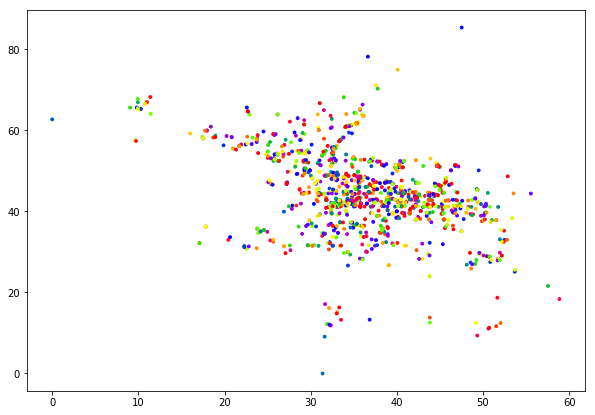

In [303]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=985, affinity='precomputed', linkage='complete')  
cluster.fit_predict(distance_matrix)  
data['label'] = cluster.labels_

plt.figure(figsize=(10, 7))  
plt.scatter(data['center_x'], data['center_y'], c=data['label'], cmap='prism',s = 8)  

In [299]:
import collections, numpy
print(collections.Counter((cluster.fit_predict(distance_matrix) )))

Counter({73: 8, 170: 5, 158: 4, 65: 3, 111: 3, 38: 3, 82: 3, 126: 3, 53: 3, 31: 3, 46: 3, 108: 3, 22: 3, 11: 3, 25: 3, 94: 3, 166: 3, 177: 3, 48: 3, 100: 3, 105: 3, 24: 3, 5: 3, 8: 3, 27: 3, 160: 3, 39: 3, 115: 2, 91: 2, 30: 2, 77: 2, 107: 2, 49: 2, 131: 2, 144: 2, 12: 2, 74: 2, 2: 2, 4: 2, 81: 2, 50: 2, 231: 2, 45: 2, 87: 2, 56: 2, 175: 2, 234: 2, 47: 2, 263: 2, 102: 2, 376: 2, 149: 2, 64: 2, 216: 2, 28: 2, 88: 2, 161: 2, 63: 2, 351: 2, 3: 2, 61: 2, 51: 2, 318: 2, 187: 2, 85: 2, 101: 2, 134: 2, 89: 2, 408: 2, 204: 2, 114: 2, 155: 2, 214: 2, 324: 2, 55: 2, 127: 2, 190: 2, 34: 2, 66: 2, 180: 2, 36: 2, 193: 2, 37: 2, 189: 2, 71: 2, 110: 2, 103: 2, 96: 2, 84: 2, 148: 2, 203: 2, 32: 2, 133: 2, 16: 2, 123: 2, 504: 2, 143: 2, 60: 2, 368: 2, 44: 2, 54: 2, 14: 2, 109: 2, 227: 2, 90: 2, 172: 2, 464: 2, 188: 2, 233: 2, 106: 2, 58: 2, 57: 2, 7: 2, 43: 2, 42: 2, 79: 2, 13: 2, 113: 2, 176: 2, 41: 2, 194: 2, 93: 2, 184: 2, 98: 2, 116: 2, 52: 2, 264: 2, 78: 2, 157: 2, 97: 2, 183: 2, 40: 2, 18: 2, 10:

(0, 90)

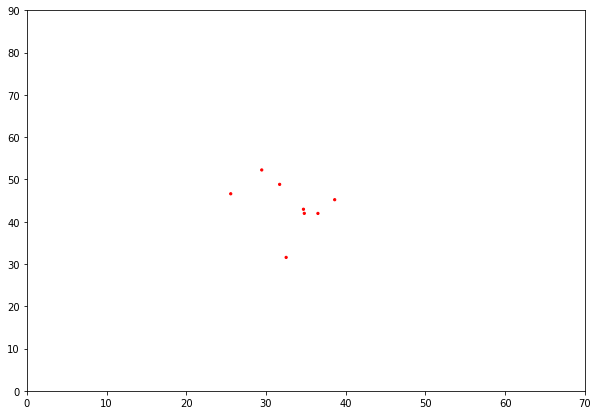

In [301]:
data_23 = data.loc[data['label'] == 73]
plt.figure(figsize=(10, 7))  
plt.scatter(data_23['center_x'], data_23['center_y'], c=data_23['label'], cmap='prism', s = 5)  
plt.xlim([0,70])
plt.ylim([0,90])